# Where it Pays to Attend College

##### Report by Matt Wong, Rhea Chen, ZK Lin, and Demi Tu

## Problem Overview

Our research fit into the broader problem domain because we are addressing problems that are not only close to home, but are also issues on a national level.

First of all, does it matter where students go to college? According to [this article](https://www.theatlantic.com/business/archive/2012/05/does-it-matter-where-you-go-to-college/257227/), the answer is yes when it comes to students’ future paychecks, and this is supported by years of research. Of course, factors that differ among individual students will make the outcome to vary, but [this research paper](https://cdn.theatlantic.com/static/mt/assets/business/Ehrenberg-JHR_Does_It_Pay_to_Attend_an_Elite_Private_College.pdf) supports the statement that the more elite a school, the better its alums’ paychecks. The rankings of the universities matter a great deal, and the effect is more evident over time.

Settling on a college is not the only difficult decision that needs to be made by students. According to the book named “The Undecided College Student: An Academic And Career Advising Challenge” written by Virginia N. Gordon, about 20 to 50 percent of students enter college as “undecided”, and an estimated 75 percent of students change their major at least once before graduation. It is also important to note that “decided” students are not necessarily basing their decision of major on factual research. According to a College Student Journal survey, that is later cited in [this journal](https://dus.psu.edu/mentor/2013/06/disconnect-choosing-major/), of more than 800 students who were asked to elaborate on their career decision-making process, factors that played a role included a general interest the student had in the subject he or she chose; family and peer influence; and assumptions about introductory courses, potential job characteristics, and characteristics of the major.

While students might fall into a never-ending cycle when choosing colleges and majors, another problem that we are addressing, on the other hand, concerns the topic of student loan debt which directly relates to our target variable, salary. According to a [study](https://evolllution.com/attracting-students/todays_learner/newly-released-student-loan-data-bust-several-myths-about-student-loan-repayment/) that analyzes student loan data, “even among those who borrowed only for their undergraduate education...only half of students had paid off all their federal student loans 20 years after beginning college in 1995-96.” Instead, average borrowers in “this group still owed approximately $10,000 in principle and interest, about half of what was originally borrowed, 20 years after beginning college.” The fact that it is very difficult for recent graduates to find well-paying jobs at the outset of their careers, significantly limited their ability to repay their student loans.

## Purpose

The overarching purpose of our research project is to provide an additional, but important, piece of information to students when they contemplate on which college to attend and what they major in college. By revealing potential relationships between colleges and/or majors and how much in salary people earn with their degrees, it will help kickstart the process of deciding on a college and major so students can have more time to learn rather than struggling to find a major of interest.

It is an important undertaking because it is a topic that is closely related to us, college students who are actively seeking jobs and/or internships. We also know we have a broad audience because there are so many incoming/current college students, just like us. If such information were accurately presented, it might affect students’ choices on colleges and majors because salary is, perhaps sadly, a very important factor when selecting a career.

## Variables

### Data from Kaggle

- `School Name` - Name of college
- `School Type` - Type of college
- `Region` - Location of college by region
- `Undergraduate Major` - Undergraduate major
- `Starting Median Salary` - Median salary at the start of career
- `Mid-Career Median Salary` - Median salary at the middle of career
- `Percent change from Starting to Mid-Career Salary` - Change in salary (measured in percentage) from starting to mid-career
- `Mid-Career 10th Percentile Salary` - Mid-career salary of the 10th percentile
- `Mid-Career 25th Percentile Salary` - Mid-career salary of the 25th percentile
- `Mid-Career 75th Percentile Salary` - Mid-career salary of the 75th percentile
- `Mid-Career 90th Percentile Salary` - Mid-career salary of the 90th percentile

### External Data

- `name` - Institution name
- `location` - Location of college
- `rank` - National rank of college
- `description` - Snippet of text overview from U.S. News
- `tuition_and_fees` - Combined tuition and fees
- `in_state` - In-state tuition
- `undergrad_enrollment` - Number of enrolled undergratuate students

In [1]:
# Set up
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np

# For graphing
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Data Preparation
### Load data into the appropriate structure

In [2]:
major = pd.read_csv('./data/degrees-that-pay-back.csv')
college_type = pd.read_csv('./data/salaries-by-college-type.csv')
college_region = pd.read_csv('./data/salaries-by-region.csv')
college_ranking = pd.read_csv('./data/national-universities-rankings.csv')

Upon initial exploration of our data sets, we realize we can only analyze the relationship between college and salary and that between major and salary separately due to the structure of the given data. Even though we can infer relationships between colleges and majors, we decide not to because we do not have the appropriate evidence to support it.

On the other hand, we can assume that *colleges* corresponds to *undergraduate majors*, meaning people went to the colleges in our data as undergraduates.

## Hypotheses

For the above reasons, we propose the following hypotheses:

**College vs Salary**
- Null hypothesis (H0): The choice of college does not have a significant impact on mid-career median salary.
- Alternative hypothesis (H1): The choice of college have a significant impact on mid-career median salary.

**Major vs Salary**
- Null hypothesis (H0): The choice of undergraduate major(s) does not have a significant impact on overall salary.
- Alternative hypothesis (H1): The choice of undergraduate major(s) have a significant impact on overall salary.

## College vs Salary

### Exploratory Data Analysis

Let us take a look at the data sets first.

#### Salaries by college type

In [3]:
college_type.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,West Virginia University (WVU),State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


#### Salaries by college region

In [4]:
college_region.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Montana State University - Billings,Northeastern,"$42,600.00","$110,000.00","$40,100.00","$67,400.00","$106,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


#### Salaries by college ranking

In [5]:
college_ranking.describe()

,rank,undergrad_enrollment
count,231.000000,231.000000
mean,113.982684,14946.619048
std,65.995518,10569.664095
min,1.000000,1001.000000
25%,56.000000,6238.500000
50%,111.000000,12949.000000
75%,171.000000,22145.500000
max,220.000000,54513.000000


As we can see above, the number of schools varies across different data sets. For the data set regarding salaries by college type, the same college appear in multiple rows if the college is categorized with multiple types. Here are all the colleges with multiple types:

In [6]:
college_type['is_duplicated'] = college_type.duplicated(["School Name"])
college_type.loc[college_type['is_duplicated'] == True]

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,is_duplicated
67,Randolph-Macon College,Liberal Arts,"$42,600.00","$83,600.00",NaN,"$54,100.00","$123,000.00",NaN,True
102,University of Illinois at Urbana-Champaign (UIUC),State,"$52,900.00","$96,100.00","$48,200.00","$68,900.00","$132,000.00","$177,000.00",True
107,"University of Maryland, College Park",State,"$52,000.00","$95,000.00","$50,400.00","$68,300.00","$126,000.00","$166,000.00",True
108,"University of California, Santa Barbara (UCSB)",State,"$50,500.00","$95,000.00","$51,300.00","$71,200.00","$129,000.00","$173,000.00",True
109,University of Texas (UT) - Austin,State,"$49,700.00","$93,900.00","$50,100.00","$67,400.00","$129,000.00","$188,000.00",True
112,State University of New York (SUNY) at Albany,State,"$44,500.00","$92,200.00","$47,000.00","$63,100.00","$135,000.00","$209,000.00",True
118,University of Florida (UF),State,"$47,100.00","$87,900.00","$45,400.00","$62,900.00","$120,000.00","$172,000.00",True
120,Louisiana State University (LSU),State,"$46,900.00","$87,800.00","$43,700.00","$61,300.00","$120,000.00","$165,000.00",True
127,University of Georgia (UGA),State,"$44,100.00","$86,000.00","$43,100.00","$57,800.00","$118,000.00","$164,000.00",True
128,Pennsylvania State University (PSU),State,"$49,900.00","$85,700.00","$46,300.00","$62,000.00","$117,000.00","$160,000.00",True


### Wrangle the data as needed for analysis / visualization

We combine the data sets of `salaries by college type`, `salaries by college region`, and `salaries by college ranking` together to create a comprehensive data set representing **salaries by college**.

In [7]:
# Merge data sets "salaries by college type" and "salaries by college region"
college = pd.merge(college_type[['School Name', 'School Type']], college_region, on=['School Name', 'School Name'])

# Resolve differences in 'School Name'
college['School Name'] = college['School Name'].str.replace(r"\((.*?)\)","").str.rstrip()

# Merge current college data set with "salaries by college ranking"
college = college.merge(college_ranking, how='outer', left_on='School Name', right_on = 'name')

# Clean up data set
college = college.loc[college['School Name'].notna()]
college = college.drop(columns=['name'])

# Sort the data set by 'rank', and then reset the indices
college = college.sort_values(by=['rank']).reset_index(drop=True)
college

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Princeton University,Ivy League,Northeastern,"$66,500.00","$131,000.00","$68,900.00","$100,000.00","$190,000.00","$261,000.00","Princeton, NJ",1.0,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,5402.0
1,Harvard University,Ivy League,Northeastern,"$63,400.00","$124,000.00","$54,800.00","$86,200.00","$179,000.00","$288,000.00","Cambridge, MA",2.0,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,6699.0
2,Yale University,Ivy League,Northeastern,"$59,100.00","$126,000.00","$58,000.00","$80,600.00","$198,000.00","$326,000.00","New Haven, CT",3.0,"Yale University, located in New Haven, Connect...","$49,480",NaN,5532.0
3,Columbia University,Ivy League,Northeastern,"$59,400.00","$107,000.00","$50,300.00","$71,900.00","$161,000.00","$241,000.00","New York, NY",5.0,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,6102.0
4,Massachusetts Institute of Technology,Engineering,Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00","Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...","$48,452",NaN,4527.0
5,University of Pennsylvania,Ivy League,Northeastern,"$60,900.00","$120,000.00","$55,900.00","$79,200.00","$192,000.00","$282,000.00","Philadelphia, PA",8.0,"The University of Pennsylvania, located in Phi...","$51,464",NaN,9726.0
6,Dartmouth College,Ivy League,Northeastern,"$58,000.00","$134,000.00","$63,100.00","$90,200.00","$234,000.00","$321,000.00","Hanover, NH",11.0,"Dartmouth College, located in Hanover, New Ham...","$51,438",NaN,4307.0
7,California Institute of Technology,Engineering,California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...","$47,577",NaN,1001.0
8,Brown University,Ivy League,Northeastern,"$56,200.00","$109,000.00","$55,400.00","$74,400.00","$159,000.00","$228,000.00","Providence, RI",14.0,"Located atop College Hill in Providence, R.I.,...","$51,367",NaN,6652.0
9,Cornell University,Ivy League,Northeastern,"$60,300.00","$110,000.00","$56,800.00","$79,800.00","$160,000.00","$210,000.00","Ithaca, NY",15.0,"Cornell University, located in Ithaca, New Yor...","$50,953",NaN,14315.0


We also transform some columns with money objects into numbers to prepare for data analysis.

In [8]:
money_columns = ['Starting Median Salary',
                 'Mid-Career Median Salary',
                 'Mid-Career 10th Percentile Salary',
                 'Mid-Career 25th Percentile Salary',
                 'Mid-Career 75th Percentile Salary',
                 'Mid-Career 90th Percentile Salary',
                 'tuition_and_fees',
                 'in_state']
for column in money_columns:
    college[column] = college[column].str.replace("$","")
    college[column] = college[column].str.replace(",","")
    college[column] = pd.to_numeric(college[column])
college

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Princeton University,Ivy League,Northeastern,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0,"Princeton, NJ",1.0,"Princeton, the fourth-oldest college in the Un...",45320.0,NaN,5402.0
1,Harvard University,Ivy League,Northeastern,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0,"Cambridge, MA",2.0,"Harvard is located in Cambridge, Massachusetts...",47074.0,NaN,6699.0
2,Yale University,Ivy League,Northeastern,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0,"New Haven, CT",3.0,"Yale University, located in New Haven, Connect...",49480.0,NaN,5532.0
3,Columbia University,Ivy League,Northeastern,59400.0,107000.0,50300.0,71900.0,161000.0,241000.0,"New York, NY",5.0,"Columbia University, located in Manhattan's Mo...",55056.0,NaN,6102.0
4,Massachusetts Institute of Technology,Engineering,Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...",48452.0,NaN,4527.0
5,University of Pennsylvania,Ivy League,Northeastern,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0,"Philadelphia, PA",8.0,"The University of Pennsylvania, located in Phi...",51464.0,NaN,9726.0
6,Dartmouth College,Ivy League,Northeastern,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0,"Hanover, NH",11.0,"Dartmouth College, located in Hanover, New Ham...",51438.0,NaN,4307.0
7,California Institute of Technology,Engineering,California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...",47577.0,NaN,1001.0
8,Brown University,Ivy League,Northeastern,56200.0,109000.0,55400.0,74400.0,159000.0,228000.0,"Providence, RI",14.0,"Located atop College Hill in Providence, R.I.,...",51367.0,NaN,6652.0
9,Cornell University,Ivy League,Northeastern,60300.0,110000.0,56800.0,79800.0,160000.0,210000.0,"Ithaca, NY",15.0,"Cornell University, located in Ithaca, New Yor...",50953.0,NaN,14315.0


### Deal with missing values

Because the data sets concerning colleges do not come from the same source, not all colleges in our comprehensive college data set has rankings. Rather than removing all the rows of colleges that do not have rankings, we decide to take this opportunity to separate our data set into two: one contains colleges with rankings, and the other contains colleges without rankings. This way we are able to see if *rank* is a deciding factor that impacts salary.

#### Colleges with rankings

In [9]:
rank = college.loc[college['rank'].notna()]
no_rank = college.loc[college['rank'].isna()]
no_rank = no_rank[['School Name',
                   'School Type',
                   'Region',
                   'Starting Median Salary',
                   'Mid-Career Median Salary', 
                   'Mid-Career 10th Percentile Salary',
                   'Mid-Career 25th Percentile Salary',
                   'Mid-Career 75th Percentile Salary',
                   'Mid-Career 90th Percentile Salary']]

# Prepare a data set that disregards the rankings
college = college[['School Name',
                   'School Type',
                   'Region',
                   'Starting Median Salary',
                   'Mid-Career Median Salary',
                   'Mid-Career 10th Percentile Salary',
                   'Mid-Career 25th Percentile Salary',
                   'Mid-Career 75th Percentile Salary',
                   'Mid-Career 90th Percentile Salary']]

# Convert 'rank' to integers
rank['rank'] = rank['rank'].astype(int)
rank

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Princeton University,Ivy League,Northeastern,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320.0,NaN,5402.0
1,Harvard University,Ivy League,Northeastern,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074.0,NaN,6699.0
2,Yale University,Ivy League,Northeastern,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480.0,NaN,5532.0
3,Columbia University,Ivy League,Northeastern,59400.0,107000.0,50300.0,71900.0,161000.0,241000.0,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056.0,NaN,6102.0
4,Massachusetts Institute of Technology,Engineering,Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,"Cambridge, MA",7,"MIT is located in Cambridge, Massachusetts, ac...",48452.0,NaN,4527.0
5,University of Pennsylvania,Ivy League,Northeastern,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0,"Philadelphia, PA",8,"The University of Pennsylvania, located in Phi...",51464.0,NaN,9726.0
6,Dartmouth College,Ivy League,Northeastern,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0,"Hanover, NH",11,"Dartmouth College, located in Hanover, New Ham...",51438.0,NaN,4307.0
7,California Institute of Technology,Engineering,California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,"Pasadena, CA",12,"Caltech, which focuses on science and engineer...",47577.0,NaN,1001.0
8,Brown University,Ivy League,Northeastern,56200.0,109000.0,55400.0,74400.0,159000.0,228000.0,"Providence, RI",14,"Located atop College Hill in Providence, R.I.,...",51367.0,NaN,6652.0
9,Cornell University,Ivy League,Northeastern,60300.0,110000.0,56800.0,79800.0,160000.0,210000.0,"Ithaca, NY",15,"Cornell University, located in Ithaca, New Yor...",50953.0,NaN,14315.0


#### Colleges with no rankings

In [10]:
no_rank

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
83,Harvey Mudd College,Engineering,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
84,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
85,Cooper Union,Engineering,Northeastern,62200.0,114000.0,NaN,80200.0,142000.0,NaN
86,Wentworth Institute of Technology,Engineering,Northeastern,53000.0,96700.0,55200.0,74000.0,117000.0,153000.0
87,Virginia Polytechnic Institute and State Unive...,Engineering,Southern,53500.0,95400.0,50600.0,71400.0,124000.0,163000.0
88,South Dakota School of Mines & Technology,Engineering,Midwestern,55800.0,93400.0,71500.0,81900.0,122000.0,147000.0
89,New Mexico Institute of Mining and Technology,Engineering,Western,51000.0,93400.0,NaN,67400.0,123000.0,NaN
90,University of Illinois at Urbana-Champaign,Party,Midwestern,52900.0,96100.0,48200.0,68900.0,132000.0,177000.0
91,University of Illinois at Urbana-Champaign,State,Midwestern,52900.0,96100.0,48200.0,68900.0,132000.0,177000.0
92,"University of Maryland, College Park",Party,Southern,52000.0,95000.0,50400.0,68300.0,126000.0,166000.0


We are aware that there are still missing values in our data sets. However, those are not independent variables or features that we will use in modeling, so we should not fill them in any way.

Let us take a look at the relationships between college rankings and salary.

In [11]:
trace_list = []
for i in rank.columns[3:9]:
    trace_list.append(go.Scatter(x=rank['rank'], y=rank[i], name = i))
layout = go.Layout(
    title='Salaries based on College Ranking',
    xaxis = dict(title = 'College Ranking'),
    yaxis = dict(title = 'Salary'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

We can see that colleges with a better ranking result in their graduates earning a higher overall salary. There are some discrepancies among the top 10 colleges, and the difference in salary is not as apparent anymore for colleges outside the top 80.

Let us take a look at the relationships between school type and salary.

In [12]:
trace_list = []
for i in college.columns[3:9]:
    trace_list.append(go.Bar(x=college['School Type'], y=college[i], name = i))
layout = go.Layout(
    barmode='group',
    title='Salaries based on School Type',
    xaxis = dict(title = 'School Type'),
    yaxis = dict(title = 'Salary'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

In this graph, the difference in starting median salary and that in mid-career median salary are actually not so apparent across different school types. The big difference is shown in the mid-career 90th percentile salary, where graduates from Ivy League schools earn significantly more than those from other types of schools.

Let us take a look at the relationships between college region and salary.

In [13]:
trace_list = []
for i in college.columns[3:9]:
    trace_list.append(go.Bar(x=college['Region'], y=college[i], name = i))
layout = go.Layout(
    barmode='group',
    title='Salaries based on College Region',
    xaxis = dict(title = 'College Region'),
    yaxis = dict(title = 'Salary'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

Again, the difference in salary does not start to show until mid-career 75th percentile in this graph. We will pay close attention to this factor when we explore the correlations between variables.

Let us take a look at the relationships between starting and mid-career median salary.

In [14]:
salary = college.sort_values(by=['Starting Median Salary'])
trace_list = []
trace_list.append(go.Scatter(x=salary['Starting Median Salary'], y=salary['Mid-Career Median Salary']))
layout = go.Layout(
    title='Mid-Career Median Salary vs Starting Median Salary',
    xaxis = dict(title = 'Starting Median Salary'),
    yaxis = dict(title = 'Mid-Career Median Salary'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

This graph shows a pretty strong linear relationship between starting median salary and mid-career median salary before the 60k mark of starting median salary. We do not have data outside this graph in this study, but it seems like the mid-career median salary starts to converge to a maximum after the 65k mark of starting median salary.

Before looking at the correlations among variables, we need encode `School Type` and `Region` into meaningful numbers in order to perform data analysis on these categorical variables. Here is the transformed data set that disregards the rankings:

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# School Type
college['School Type'] = label_encoder.fit_transform(college['School Type'])
rank['School Type'] = label_encoder.fit_transform(rank['School Type'])

# Region
college['Region'] = label_encoder.fit_transform(college['Region'])
rank['Region'] = label_encoder.fit_transform(rank['Region'])

college

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Princeton University,1,2,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0
1,Harvard University,1,2,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0
2,Yale University,1,2,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0
3,Columbia University,1,2,59400.0,107000.0,50300.0,71900.0,161000.0,241000.0
4,Massachusetts Institute of Technology,0,2,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
5,University of Pennsylvania,1,2,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0
6,Dartmouth College,1,2,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0
7,California Institute of Technology,0,0,75500.0,123000.0,NaN,104000.0,161000.0,NaN
8,Brown University,1,2,56200.0,109000.0,55400.0,74400.0,159000.0,228000.0
9,Cornell University,1,2,60300.0,110000.0,56800.0,79800.0,160000.0,210000.0


Here is the transformed data set that takes rankings into account:

In [16]:
rank

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Princeton University,1,2,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320.0,NaN,5402.0
1,Harvard University,1,2,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074.0,NaN,6699.0
2,Yale University,1,2,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480.0,NaN,5532.0
3,Columbia University,1,2,59400.0,107000.0,50300.0,71900.0,161000.0,241000.0,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056.0,NaN,6102.0
4,Massachusetts Institute of Technology,0,2,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,"Cambridge, MA",7,"MIT is located in Cambridge, Massachusetts, ac...",48452.0,NaN,4527.0
5,University of Pennsylvania,1,2,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0,"Philadelphia, PA",8,"The University of Pennsylvania, located in Phi...",51464.0,NaN,9726.0
6,Dartmouth College,1,2,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0,"Hanover, NH",11,"Dartmouth College, located in Hanover, New Ham...",51438.0,NaN,4307.0
7,California Institute of Technology,0,0,75500.0,123000.0,NaN,104000.0,161000.0,NaN,"Pasadena, CA",12,"Caltech, which focuses on science and engineer...",47577.0,NaN,1001.0
8,Brown University,1,2,56200.0,109000.0,55400.0,74400.0,159000.0,228000.0,"Providence, RI",14,"Located atop College Hill in Providence, R.I.,...",51367.0,NaN,6652.0
9,Cornell University,1,2,60300.0,110000.0,56800.0,79800.0,160000.0,210000.0,"Ithaca, NY",15,"Cornell University, located in Ithaca, New Yor...",50953.0,NaN,14315.0


#### Variable Correlations

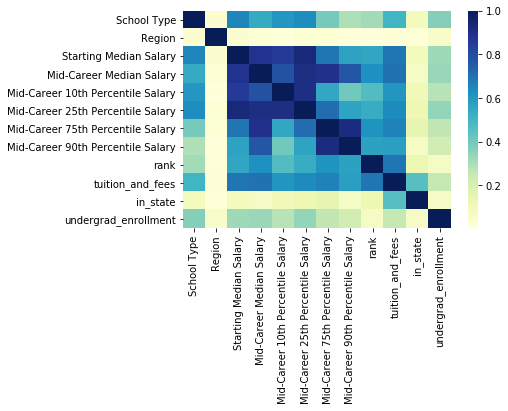

In [17]:
sns.heatmap(rank.corr()**2, cmap="YlGnBu")

In this case, we used the correlation squared values because we are only concerned with the strength of the correlations, not whether they are positive or negative correlations. The closer to 1.0, the stronger the correlation.

From the above graph, we can see that there are some notable correlations between `School Type` and salary in general. This does not seem like the case for `Region` though. We will need to use more than one variable to make our predictions because more than one variable have strong correlation with salary.

### Feature Engineering & Selection

Although we did not create new features based on our domain knowledge, we incorporated an external data set that provides important insights of what we are trying to generate.

We will now perform feature selection using `VarianceThreshold`. We decide to use this approach because it removes all features whose variance is low, meaning they do not have much effect on the target variable. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Before performing this feature selection, we think that it might not be needed because we do not have that many features to start with and they all seem to have relationships with salary.

In [18]:
# Prepare features to perform feature selection
rank_feature = rank[['School Type', 'Region', 'Starting Median Salary', 'rank', 'tuition_and_fees', 'undergrad_enrollment']]

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
result = sel.fit_transform(rank_feature)

We only input the relevant features that can be interpreted by the learning based approach, and they are `School Type`, `Region`, `Starting Median Salary`, `rank`, `tuition_and_fees`, and `undergrad_enrollment`.

We did not output the results because they are more interpretable through explanations. The results show that we should keep all the above features when we model our data.

### Modeling

#### Split data into train/test sets

In [19]:
from sklearn.model_selection import train_test_split
rank_train_features, rank_test_features, rank_train_outcomes, rank_test_outcomes = train_test_split(rank_feature, rank[['Mid-Career Median Salary']], test_size = 0.2)
print("Shape of training features: ", rank_train_features.shape)
print("Shape of test features: ", rank_test_features.shape)
print("Shape of training outcomes: ", rank_train_outcomes.shape)
print("Shape of test outcomes: ", rank_test_outcomes.shape)

Shape of training features:  (66, 6)
Shape of test features:  (17, 6)
Shape of training outcomes:  (66, 1)
Shape of test outcomes:  (17, 1)


#### Normalize data

Data normalization is needed because different features are scaled differently. For example, the number of categories are different for `School Type` and `Region`. In this case, we will use a `MinMaxScaler` that subtracts the minimum, and divides by the difference between the minimum and the maximum of each column.

In order to not leak information from out test data into our training data, we normalized our data after splitting.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rank_train_features_scaled = scaler.fit_transform(rank_train_features)

We then fit a *multiple linear regression* model with the scaled training data. We chose linear regression because the dependent variable, `Mid-Career Median Salary`, is measured on a continuous measurement scale and the independent variables consist of categorical and continuous measurments.

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit a linear regression model with the scaled training data
lr.fit(rank_train_features_scaled, rank_train_outcomes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

After fitting the model, we use it to make predictions on the test data. We will save the results, and then move onto cross validation.

In [22]:
# Normalize test data
rank_test_features_scaled = scaler.fit_transform(rank_test_features)

# Generate predictions using *scaled test data*
rank_test_outcomes['Initial Prediction'] = lr.predict(rank_test_features_scaled)

#### Cross validation score

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 10, shuffle=True)
np.mean(cross_val_score(lr, rank_train_features_scaled, rank_train_outcomes, cv = folds))

0.87829205311641

#### Optimize the (hyper) parameters of the model using a grid-search

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(lr, param_grid = params, cv = folds, return_train_score=True)

# Fit the grid-search to training data
rank_grid = grid_search.fit(rank_train_features_scaled, rank_train_outcomes)

# Predict and assess performance on **test** data
print("Performance: ", grid_search.score(rank_test_features_scaled, rank_test_outcomes['Mid-Career Median Salary']))
print("Best parameters: ", grid_search.cv_results_['params'][grid_search.best_index_])
rank_test_outcomes['Grid-search Prediction'] = rank_grid.predict(rank_test_features_scaled)

Performance:  0.08410933751461369
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


The cross validation score and the performance of grid-search can vary due to the randomness of splitting training and testing data. In general though, we were able to improve the accuracy of our model by using grid-search.

### Validation & Visualization

We access the accuracy of the model by calculating the *Root Mean Squared Error* (RMSE), which is the square root of the mean of the squared errors. This is the correct approach for our linear regression model because it is interpretable in the "y" units.

In [25]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(rank_test_outcomes['Mid-Career Median Salary'], rank_test_outcomes['Grid-search Prediction']))

8692.585520918457

We believe this high RMSE is due to our large salary units. It might be easier to understand our results by visualizing the predictions.

In [26]:
# Plot
rank_test_outcomes = rank_test_outcomes.sort_values(by=['Mid-Career Median Salary'])
trace_list = []
trace_list.append(go.Scatter(x=rank_test_outcomes['Mid-Career Median Salary'], y=rank_test_outcomes['Grid-search Prediction'], mode = 'markers', name='Predicted'))
trace_list.append(go.Scatter(x=rank_test_outcomes['Mid-Career Median Salary'], y=rank_test_outcomes['Mid-Career Median Salary'], name='Expected'))
layout = go.Layout(
    title='Mid-Career Median Salary Prediction',
    xaxis = dict(title = 'Expected'),
    yaxis = dict(title = 'Predicted')
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

We can see that our model in fact performed well because our predictions are fairly close to the line of expectation.

### Conclusion

After exploring relationships between features that represent the choices of college and salary graduates make after college, as well as making predictions specifically about the mid-career median salary using our multiple linear regression model, we can conclude that the choice of college does have a significant impact on mid-career median salary.



### Modeling

#### Split data into train/test sets
#### Pre-process/Normalize data using a scaler (if necessary)
#### Perform cross validation
#### Optimize the (hyper) parameters of the model using a grid-search
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Major vs Salary

### Exploratory Data Analysis

Let us take a look at the data set first.

In [27]:
major.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### Wrangle the data as needed for analysis / visualization

Replace all strings representing salaires with integers. This enables us to perform analysis on the data. 

In [28]:
major['Starting Median Salary'] = major['Starting Median Salary'].str.replace(',', '')
major['Starting Median Salary'] = major['Starting Median Salary'].str.replace('.', '')
major['Starting Median Salary'] = major['Starting Median Salary'].str.replace('$', '')
major['Starting Median Salary'] = major['Starting Median Salary'].astype(float)

major['Mid-Career Median Salary'] = major['Mid-Career Median Salary'].str.replace(',', '')
major['Mid-Career Median Salary'] = major['Mid-Career Median Salary'].str.replace('.', '')
major['Mid-Career Median Salary'] = major['Mid-Career Median Salary'].str.replace('$', '')
major['Mid-Career Median Salary'] = major['Mid-Career Median Salary'].astype(float)

major['Mid-Career 10th Percentile Salary'] = major['Mid-Career 10th Percentile Salary'].str.replace(',', '')
major['Mid-Career 10th Percentile Salary'] = major['Mid-Career 10th Percentile Salary'].str.replace('.', '')
major['Mid-Career 10th Percentile Salary'] = major['Mid-Career 10th Percentile Salary'].str.replace('$', '')
major['Mid-Career 10th Percentile Salary'] = major['Mid-Career 10th Percentile Salary'].astype(float)

major['Mid-Career 25th Percentile Salary'] = major['Mid-Career 25th Percentile Salary'].str.replace(',', '')
major['Mid-Career 25th Percentile Salary'] = major['Mid-Career 25th Percentile Salary'].str.replace('.', '')
major['Mid-Career 25th Percentile Salary'] = major['Mid-Career 25th Percentile Salary'].str.replace('$', '')
major['Mid-Career 25th Percentile Salary'] = major['Mid-Career 25th Percentile Salary'].astype(float)

major['Mid-Career 75th Percentile Salary'] = major['Mid-Career 75th Percentile Salary'].str.replace(',', '')
major['Mid-Career 75th Percentile Salary'] = major['Mid-Career 75th Percentile Salary'].str.replace('.', '')
major['Mid-Career 75th Percentile Salary'] = major['Mid-Career 75th Percentile Salary'].str.replace('$', '')
major['Mid-Career 75th Percentile Salary'] = major['Mid-Career 75th Percentile Salary'].astype(float)

major['Mid-Career 90th Percentile Salary'] = major['Mid-Career 90th Percentile Salary'].str.replace(',', '')
major['Mid-Career 90th Percentile Salary'] = major['Mid-Career 90th Percentile Salary'].str.replace('.', '')
major['Mid-Career 90th Percentile Salary'] = major['Mid-Career 90th Percentile Salary'].str.replace('$', '')
major['Mid-Career 90th Percentile Salary'] = major['Mid-Career 90th Percentile Salary'].astype(float)

### Feature Engineering

In this section, we will calculate the rank of each undergraduate major for each percentile column and mid-career salary and then use that to compute a new variable `Rank_Sum`. By taking the sum of all percentile ranks, we hope control for undergraduate majors that have extremely high salaries in a single percentile. We also introduce another new variable `Greatest_Range` that is the difference between the 90th percentile and the 10th percentile in hopes to account for the variability within the salaries.

In [29]:
major['90th_Rank'] = major['Mid-Career 90th Percentile Salary'].rank(method='dense', ascending=True) 
major['75th_Rank'] = major['Mid-Career 75th Percentile Salary'].rank(method='dense', ascending=True) 
major['25th_Rank'] = major['Mid-Career 25th Percentile Salary'].rank(method='dense', ascending=True)
major['10th_Rank'] = major['Mid-Career 10th Percentile Salary'].rank(method='dense', ascending=True)

# Create new variables
major['Mid_Career_Rank'] = major['Mid-Career Median Salary'].rank(method='dense', ascending=True)
major['Rank_Sum'] = major['90th_Rank'] + major['75th_Rank'] + major['25th_Rank'] + major['10th_Rank'] + major['Mid_Career_Rank']
major['Greatest_Range'] = major['Mid-Career 90th Percentile Salary'] - major['Mid-Career 10th Percentile Salary']

Let us take a look at our transformed data set now.

In [30]:
major.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,90th_Rank,75th_Rank,25th_Rank,10th_Rank,Mid_Career_Rank,Rank_Sum,Greatest_Range
0,Accounting,4600000.0,7710000.0,67.6,4220000.0,5610000.0,10800000.0,15200000.0,27.0,30.0,28.0,28.0,28.0,141.0,10980000.0
1,Aerospace Engineering,5770000.0,10100000.0,75.0,6430000.0,8210000.0,12700000.0,16100000.0,32.0,38.0,45.0,41.0,46.0,202.0,9670000.0
2,Agriculture,4260000.0,7190000.0,68.8,3630000.0,5210000.0,9630000.0,15000000.0,26.0,21.0,23.0,16.0,24.0,110.0,11370000.0
3,Anthropology,3680000.0,6150000.0,67.1,3380000.0,4550000.0,8930000.0,13800000.0,19.0,17.0,14.0,10.0,13.0,73.0,10420000.0
4,Architecture,4160000.0,7680000.0,84.6,5060000.0,6220000.0,9700000.0,13600000.0,18.0,23.0,35.0,35.0,27.0,138.0,8540000.0


## Model

We selected greatest range, mid career median salary, starting median salary, and rank sum as the columns to be used to compute our clusters. The range is used in order to capture the amount variability within the salaries for each major. In order to get a sense of what the salary is like for an average person, we also include mid career and starting median salaries. Finally we include the sum of all the ranks. We believe this variable will help account for any major that has its median salary affected by especially high or low salaries within a percentile. 

In [31]:
df = major[["Greatest_Range", "Mid-Career Median Salary", "Starting Median Salary", "Rank_Sum"]]

After scaling the data we then create an plot using the elbow method. This method determins the optimal number of clusters to use by showing where the increase in clusters does not account for any more explination in the variance. 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

from sklearn.cluster import KMeans

cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(X_scaled)
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

trace_list = []
trace_list.append(
    go.Scatter(
        x=clusters_df.num_clusters, 
        y=clusters_df.cluster_errors)
)

layout = go.Layout(
    title='Number of Cluster v.s. Cluster Errors',
    showlegend= False,
    xaxis = dict(title = 'Number of Cluster'),
    yaxis = dict(title = 'Cluster Errors'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

Based on the plot we chose to use five clusters for our K means model. Due to the small size of the data set, a larger number of clusters may subdivde the Undergraduate majors into indiscernible clusters.

Next we create the KMeans model and fit it to our data. We then take cluster Ids and attach them back onto the original data set.

In [35]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

major["predicted_means_clusters"] = y_kmeans
df = major

The plot below visualizes the different clusters selected by the model and the center of each cluster.

In [36]:
centers = kmeans.cluster_centers_

scatter_trace_list = []
scatter_trace_list.append(
    go.Scatter(
        x=X_scaled[:, 0], 
        y=X_scaled[:, 1], 
        mode = 'markers', 
        marker=dict(
            color = y_kmeans))
)
scatter_trace_list.append(
    go.Scatter(
        x=centers[:, 0], 
        y=centers[:, 1], 
        marker=dict(
            size = 17,
            color = 'rgba(0,102,204, .5)',
        ),
        mode = 'markers',
        name = 'Center'
    )
)
layout = go.Layout(
    title='Visualization for Splited Culsters',
    showlegend= False
)
fig = go.Figure(data=scatter_trace_list, layout=layout)
py.offline.iplot(fig)

Finally we split the original data set by cluster id

In [37]:
culster_groups = major.groupby("predicted_means_clusters")
cluster_one = culster_groups.get_group(0)
cluster_two = culster_groups.get_group(1)
cluster_three = culster_groups.get_group(2)
cluster_four = culster_groups.get_group(3)
cluster_five = culster_groups.get_group(4)

## Results

### Cluster One 
The smallest cluster in terms of number of majors, this cluster contains degrees all related heavily to mathematics. It also contains the second highest average mid career salary.

In [38]:
cluster_one = cluster_one[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
tidy = (
    cluster_one.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


cluster_one_trace_list = []

for label, label_df in tidy.groupby('Undergraduate Major'):
    cluster_one_trace_list.append(
        go.Bar(
            x=label_df.Variable,
            y=label_df.Value,
            name=label
        )
    )

layout = go.Layout(
    barmode='group',
    title='Major and Salary in Cluster one',
    xaxis = dict(title = 'Career Period', tickangle = 50),
    yaxis = dict(title = 'Salary'),
    width=800,
    margin=go.layout.Margin(
            b=200,
            t=100,
            pad=10
        ),
)
fig = go.Figure(data=cluster_one_trace_list, layout=layout)
py.offline.iplot(fig)

### Cluster Two

This cluster has a relatively low mid career median salary, but unlike the first these majors produce careers with a much smaller range between the percentiles. 

In [39]:
cluster_two = cluster_two[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
tidy = (
    cluster_two.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


cluster_two_trace_list = []

for label, label_df in tidy.groupby('Undergraduate Major'):
    cluster_two_trace_list.append(
        go.Bar(
            x=label_df.Variable,
            y=label_df.Value,
            name=label
        )
    )

layout = go.Layout(
    barmode='group',
    title='Major and Salary in Cluster Two',
    xaxis = dict(title = 'Career Period', tickangle = 50),
    yaxis = dict(title = 'Salary'),
    width=800,
    margin=go.layout.Margin(
            b=200,
            t=100,
            pad=10
        ),
)
fig = go.Figure(data= cluster_two_trace_list, layout=layout)
py.offline.iplot(fig)

### Cluster Three

This cluster has good, but not great median salary and good room for growth. Containing majors such as Business Management, Accounting, IT, and Marketing, this cluster seems to be consistantly above average

In [40]:
cluster_three = cluster_three[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
tidy = (
    cluster_three.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)

cluster_three_trace_list = []

for label, label_df in tidy.groupby('Undergraduate Major'):
    cluster_three_trace_list.append(
        go.Bar(
            x=label_df.Variable,
            y=label_df.Value,
            name=label
        )
    )

layout = go.Layout(
    barmode='group',
    title='Major and Salary in Cluster Three',
    xaxis = dict(title = 'Career Period', tickangle = 50),
    yaxis = dict(title = 'Salary'),
    width=800,
    margin=go.layout.Margin(
            b=200,
            t=100,
            pad=10
        ),
)
fig = go.Figure(data= cluster_three_trace_list, layout=layout)
py.offline.iplot(fig)

### Cluster Four

The easiest to categorize, this cluster contains all of the engineering majors with the addition of physician assitant and construction. This cluster has a relatively high median mid career salary with good room for growth.

In [41]:
cluster_four = cluster_four[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
tidy = (
    cluster_four.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


cluster_four_trace_list = []

for label, label_df in tidy.groupby('Undergraduate Major'):
    cluster_four_trace_list.append(
        go.Bar(
            x=label_df.Variable,
            y=label_df.Value,
            name=label
        )
    )

layout = go.Layout(
    barmode='group',
    title='Major and Salary in Cluster Four',
    xaxis = dict(title = 'Career Period', tickangle = 50),
    yaxis = dict(title = 'Salary'),
    width=800,
    margin=go.layout.Margin(
            b=200,
            t=100,
            pad=10
        ),
)
fig = go.Figure(data= cluster_four_trace_list, layout=layout)
py.offline.iplot(fig)

### Cluster Five

This cluster contains the largest range between the percentiles of all the clusters. Containing undergraduate majors like drama, music, film, and journalism, which can pay exceptionally well if you're successful, but overall pay less that other options.

In [42]:
cluster_five = cluster_five[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
tidy = (
    cluster_five.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)

cluster_five_trace_list = []

for label, label_df in tidy.groupby('Undergraduate Major'):
    cluster_five_trace_list.append(
        go.Bar(
            x=label_df.Variable,
            y=label_df.Value,
            name=label
        )
    )

layout = go.Layout(
    barmode='group',
    title='Major and Salary in Cluster Five',
    xaxis = dict(title = 'Career Period', tickangle = 50),
    yaxis = dict(title = 'Salary'),
    width=800,
    margin=go.layout.Margin(
            b=200,
            t=100,
            pad=10
        ),
)
fig = go.Figure(data= cluster_five_trace_list, layout=layout)
py.offline.iplot(fig)

## Conclusion

We set out to discover how the choice in Undergraduate Major impacted salary throughout a person's career. Through our approach we created five clusters. From these clusters we can see several interestind details. Firstly, if you want a career with a high paying salary, a major that has its basis in math seems to the the way to go. This can be seen in cluster two, containing predomintely engineering majors, and cluster five with contains majors like Math, Physics, and Economics. Both of these cluster sport high mid career median salaries as well as some of the highest areas for growth. Other undergraduate majors can be more risky, such as Drama, Journalism, and Music. These majors and others like them in cluster four, have relatively low mid career salaries, but have a drastic amount of potential growth as there 90th percentile has some of the highest salaries. Based on these clusters, we do believe that Undergradate Major has an impact on salary.